In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')

ma = ma[ma['avg_ntl'] != '#DIV/0!']
ma['avg_ntl'] = ma['avg_ntl'].astype(float)
ma['total_population'] = pd.to_numeric(ma['total_population'], errors='coerce')
ma = ma.dropna(subset=['total_population'])
ma['total_population'] = ma['total_population'].astype(float)
values_to_drop = ['west pgs', 'New District', 'New Districtffff', 'Sadaruru']
# Dropping rows with specified values in the 'District' column
ma = ma[~ma['District'].isin(values_to_drop)]

meg = ma.copy()
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']
meg['ntl_adm']= 0.0 
meg["ntl_edu"]= 0.0 
meg["ntl_med"]= 0.0 
meg["ntl_adm"]= meg['avg_ntl'] * 0.0522
meg["ntl_edu"]= meg['avg_ntl'] * 0.0395
meg["ntl_med"]= meg['avg_ntl'] * 0.0098

meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']
meg["ntl_pc_adm"]= meg['ntl_adm']/meg['total_population']
meg["ntl_pc_edu"]= meg['ntl_edu']/meg['total_population']
meg["ntl_pc_med"]= meg['ntl_med']/meg['total_population']


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_33444/1654013351.py:13: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')


In [6]:
agro_max = meg['agro'].max()
print(agro_max)
edu_max = ma['edu'].max()
print(edu_max)
med_max = ma['med'].max()
print(med_max)
transportadmin_max = ma['transportadmin'].max()
print(transportadmin_max)

12
7
5
9


In [92]:
meg

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,0.11152,0.08439,0.02094
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,0.00873,0.00660,0.00164
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIPUR,234473.00000,RADHANAGAR,Radha Nagar (RV),744202.00000,543.00000,NaN,NaN,1091.00000,596.00000,495.00000,279.00000,97.00000,182.00000,83.44000,0.00000,1,0,0,1,1,1,74.00

## Subdist Level

In [42]:
mer_sub = meg.groupby(['Subdistrict','District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum'}).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum','transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area'})
mer_sub['dist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(meg, mer_sub, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area,dist_ntl_pc
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,0.11152,0.08439,0.02094,1252.59829,48692.00000,137,100,74,91,38.00295,0.02572
1,23.79855,39.40030,45.76405,45.12989,29.89069,28.44812,28.90281,28.41018,0.00000,27.71495,30.36922,25.47653,32.11866,28.90281,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645480.00000,Chouldari (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,234480.00000,CHOULDARI,Chouldari (RV),744103.00000,543.00000,NaN,0,2543.00000,1304.00000,1239.00000,633.00000,153.00000,77.00000,6.90000,46.00000,1,0,0,1,1,1,118.00000,20.00000,0.00000,1,1,71.00000,65.00000,68.00000,27.00000,0.00000,0.00000,0.00000,0.00000,43.00000,61.00000,12.00000,74.00000,27.00000,Port Blair,1.83633,1.42953,8,3,3,0,2,4,0.01263,1.67659,1.26869,0.31476,0.00066,0.00050,0.00012,1252.59829,48692.00000,137,100,74,91,38.00295,0.02572
2,17.85441,35.49169,40.45396,45.07238,37.84772,30.02493,6.31592,32.36100,0.00000,26.42385,34.00941,21.83233,29.78978,32.36100,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645466.00000,Namunaghar (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,234487.00000,NA

In [43]:
sub_sorted = mer_all_sub.sort_values(by=['District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby('Subdistrict').cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby('Subdistrict')['Index'].transform('max')
sub_sorted

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area,dist_ntl_pc,Index,Max_Len
498009,4.44351,4.90339,4.99293,5.41471,4.78350,3.60352,2.24898,2.60787,0.00000,4.04546,5.34326,4.02563,4.21934,4.44351,NORTH TWENTY FOUR PARGAN*,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,322989.00000,Harapur,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107782.00000,MARICHA,Harapur,743711.00000,227.00000,1917.00000,NaN,2285.00000,1163.00000,1122.00000,437.00000,81.00000,45.00000,52.00000,127.00000,1,0,0,1,1,1,61.00000,3.00000,0.00000,1,1,62.00000,22.00000,37.00000,22.00000,0.00000,3.00000,0.00000,0.00000,34.00000,28.00000,42.00000,37.00000,22.00000,Haringhata,5.66798,1.25462,0,1,2,1,2,0,0.00185,0.22025,0.16666,0.04135,0.00010,0.00007,0.00002,1133.67593,220019.00000,97,132,132,131,165.84871,0.00515,1,78
498008,4.33229,4.97927,5.39940,6.39711,4.90331,4.71239,3.16922,3.17748,0.00000,4.13878,5.68771,4.56632,4.67848,4.71239,NORTH TWENTY FOUR PARGAN*,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,323028.00000,Gajbanda,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107783.00000,SADHANPUR,Gajbanda,743221.00000,227.00000,1917.00000,NaN,2388.00000,1204.00000,1184.00000,482.00000,360.00000,122.00000,143.00000,120.00000,1,0,0,0,0,1,160.00000,4.00000,0.00000,1,1,125.00000,125.00000,45.00000,125.00000,125.00000,0.00000,0.00000,0.00000,90.00000,70.00000,470.00000,160.00000,125.00000,Amdanga,1.38877,1.69703,0,1,2,0,2,0,0.00196,0.24422,0.18480,0.04585,0.00010,0.00008,0.00002,1133.67593,220019.00000,97,132,132,131,165.84871,0.00515,2,78
498001,7.49399,8.42145,8.13821,8.57064,7.06748,6.24031,5.01933,4.88810,0.00000,7.64726,10.50267,7.01818,7.36433,7.49399,NORTH TWENTY FOUR PARGAN*,19.00000,WESTBENGAL,19.00000,303.00000,24 PARAGANAS NORTH,337.00000,2322.00000,Amdanga,2322.00000,323048.00000,Sonadanga,2723.00000,AMDANGA,19.00000,WEST BENGAL,303.00000,24 PARAGANAS NORTH,2322.00000,Amdanga,2723.00000,AMDANGA,107778.00000,AMDANGA,Sonadanga,700125.00000,227.00000,1917.00000,NaN,3520.00000,1798.00000,1722.00000,7

In [44]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','subdist_area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
filter_sub 

,Subdistrict,District,District_code,State,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,66,52,43,58,66.57653
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,1,1,1,2,1.74309
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,36,46,57,33,95.19240
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,162,191,255,194,250.06270
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,54,32,30,42,43.85376
...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,10,15,23,38,24.26537
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,93,100,86,85,117.59500
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,1,1,1,1,1.61134
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,5,4,4,7,1.43577


In [64]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale = sub_sorted.groupby(['Subdistrict','District','District_code','State',
                          'subdist_ntl','subdist_population',
                          'dist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale.columns = ['Subdistrict','District','District_code','State','subdist_ntl',
               'subdist_population','dist_ntl_pc','sum_y','numerator', 'num','alesina']
ale

# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203
1,ADILABAD URBAN,ADILABAD,532.00000,TELANGANA,10.55057,538.00000,0.01961,0.01961,0.01961,1.00000,0.00000
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257
4,ANTHERGAON,PEDDAPALLI,0.00000,TELANGANA,1156.18224,22562.00000,0.05124,0.97772,5.33485,17.00000,0.41689
...,...,...,...,...,...,...,...,...,...,...,...
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.19870,0.50546,6.00000,0.31872
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,2.39675,29.41035,61.00000,0.61407
5596,subdistrict new,ALLAHABAD,175.00000,UTTAR PRADESH,25.33902,1011.00000,0.02506,0.02506,0.02506,1.00000,0.00000
5597,veppur,CUDDALORE,617.00000,TAMIL NADU,48.19620,4453.00000,0.01082,0.01082,0.01082,1.00000,0.00000


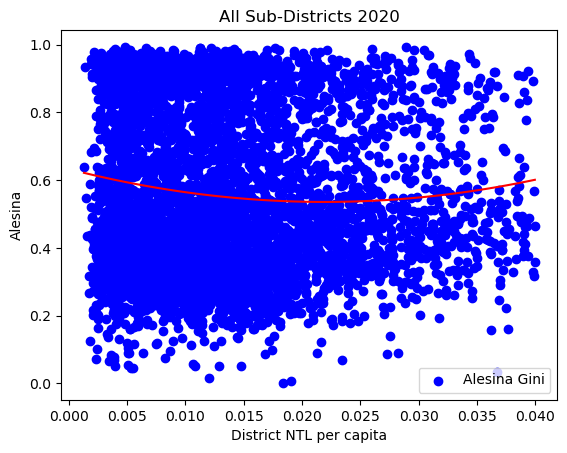

In [57]:
ale = ale[ale['dist_ntl_pc'] <= 0.04]
ale = ale[ale['alesina'] > 0]

# Create a scatterplot
plt.scatter(ale['dist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("Alesina")
plt.title("All Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['dist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['dist_ntl_pc']), max(ale['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [66]:
panel = pd.merge(ale, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')
panel = panel[panel['dist_ntl_pc'] <= 0.04]
panel = panel[panel['alesina'] > 0]

panel

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,A.Konduru,KRISHNA,547.00000,ANDHRA PRADESH,1562.69600,48612.00000,0.03215,0.92292,6.12607,22.00000,0.44203,66,52,43,58,66.57653
2,AIDILABAD RURAL,ADILABAD,532.00000,TELANGANA,1105.03880,32664.00000,0.03383,1.62243,17.07848,34.00000,0.41021,36,46,57,33,95.19240
3,ANANDPURI,BANSWARA,125.00000,RAJASTHAN,1295.66706,157564.00000,0.00822,1.04621,48.86107,122.00000,0.24257,162,191,255,194,250.06270
6,ASIKA,GANJAM,388.00000,ODISHA,709.41057,162184.00000,0.00437,3.15380,20.65378,96.00000,0.87398,165,132,164,121,114.28196
7,ASNAWAR,JHALAWAR,129.00000,RAJASTHAN,1339.82289,62669.00000,0.02138,2.46217,49.87571,77.00000,0.48684,88,108,112,44,193.30593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,newviewsub,viewnew,0.00000,ANDHRA PRADESH,87.52540,10112.00000,0.00866,0.03404,0.07177,4.00000,0.19584,16,7,7,12,6.37260
5593,pagalkhana,AGRA a,146.00000,UTTAR PRADESH,232.54148,20119.00000,0.01156,0.04262,0.07080,3.00000,0.22586,3,7,8,10,11.69378
5594,pisimoni,Anirban,0.00000,WESTBENGAL,4233.69165,127107.00000,0.03331,0.19870,0.50546,6.00000,0.31872,10,15,23,38,24.26537
5595,singhsingh,viewnew,0.00000,ANDHRA PRADESH,2270.92356,64319.00000,0.03531,2.39675,29.41035,61.00000,0.61407,93,100,86,85,117.59500


## Dist Level

In [82]:
meg_dist = meg.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                  'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum'}).reset_index()
meg_dist['avg_ntl'] = meg_dist['avg_ntl'].astype(float)
meg_dist = meg_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population',
                                    'agro':'dist_agro_sum','med':'dist_med_sum','edu':'dist_edu_sum','transportadmin':'dist_transportadmin_sum','area_sq_km':'dist_area'})
meg_dist['dist_ntl_pc'] = meg_dist['dist_ntl']/meg_dist['dist_population']

total_population_sum = meg_dist['dist_population'].sum()
print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951788450.0


In [83]:
meg_all_dist = pd.merge(meg, meg_dist, on=['District','District_code','State'], how='outer')

meg_all_dist['pop_share'] = meg_all_dist['total_population']/meg_all_dist['dist_population']
# meg_all_dist
meg_sorted = meg_all_dist.sort_values(by=['District', 'ntl_pc'])
meg_sorted['Index'] = meg_sorted.groupby('District').cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
meg_sorted['Max_Len'] = meg_sorted.groupby('District')['Index'].transform('max')
# meg_sorted

In [84]:
columns_to_keep = ['District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','subdist_area']

# Create a new DataFrame with only the selected columns
filter_dist = mer_sub[columns_to_keep]
filter_dist 

,District,District_code,State,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,2282,2702,2863,2712,3311.17266
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,7678,3678,3864,4353,3720.86919
2,ADILABAD,532.00000,TELANGANA,727,899,854,648,1349.33705
3,AGAR MALWA,0.00000,MADHYA PRADESH,679,600,798,599,1307.83716
4,AGRA a,146.00000,UTTAR PRADESH,994,1079,1599,1086,2464.66959
...,...,...,...,...,...,...,...,...
587,YAVATMAL,510.00000,MAHARASHTRA,2988,2653,2664,3023,4416.22542
588,demoz,0.00000,ANDHRA PRADESH,165,155,124,73,123.24484
589,rewa a,0.00000,UTTAR PRADESH,1737,1771,2268,1675,3661.72557
590,test dist,0.00000,ANDHRA PRADESH,3376,2318,2143,2586,2027.10006


In [86]:

def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# Calculate WCV for each state using groupby and apply
all = meg_sorted.groupby(['District','District_code','State',
                          'dist_ntl','dist_population',
                          'dist_ntl_pc']).apply(calculate_alesina).reset_index()

# Reset the index and rename the result column
all.columns = ['District','District_code','State','dist_ntl',
               'dist_population','dist_ntl_pc','sum_y','numerator', 'num','alesina']


all

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc,sum_y,numerator,num,alesina
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464,68.41514,3478.54972,1563.00000,0.93558
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407,39.60789,6188.25534,2031.00000,0.84664
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603,71.87995,3159.57109,509.00000,0.82925
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579,8.18986,1238.25226,437.00000,0.31033
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911,70.18014,1825.49076,720.00000,0.92913
...,...,...,...,...,...,...,...,...,...,...
587,YAVATMAL,510.00000,MAHARASHTRA,39435.12096,2166418.00000,0.01820,1501.15943,62798.81702,1888.00000,0.95621
588,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786,1.83225,67.93247,139.00000,0.47373
589,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775,14.69595,4914.19646,1282.00000,0.47911
590,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695,145.61037,14037.98942,1200.00000,0.84015


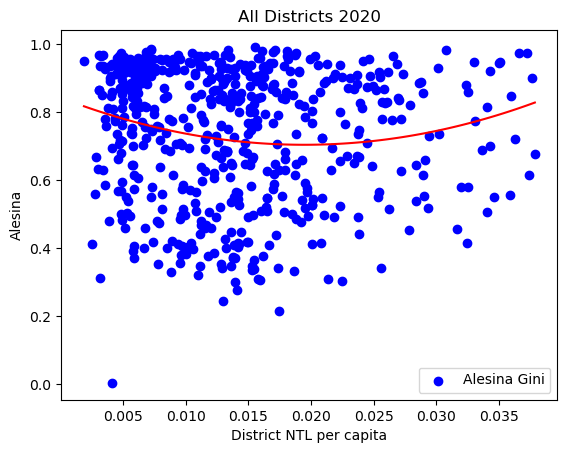

In [89]:
all = all[all['dist_ntl_pc'] <= 0.04]
all = all[all['alesina'] > 0]

# Create a scatterplot
plt.scatter(all['dist_ntl_pc'], all['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("Alesina")
plt.title("All Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(all['dist_ntl_pc'], all['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(all['dist_ntl_pc']), max(all['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [90]:
dist_panel = pd.merge(all, filter_dist, on=['District','District_code','State'], how='right')
dist_panel = dist_panel[dist_panel['dist_ntl_pc'] <= 0.04]
dist_panel = dist_panel[dist_panel['alesina'] > 0]

dist_panel

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_area
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464,68.41514,3478.54972,1563.00000,0.93558,2282,2702,2863,2712,3311.17266
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407,39.60789,6188.25534,2031.00000,0.84664,7678,3678,3864,4353,3720.86919
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603,71.87995,3159.57109,509.00000,0.82925,727,899,854,648,1349.33705
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579,8.18986,1238.25226,437.00000,0.31033,679,600,798,599,1307.83716
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911,70.18014,1825.49076,720.00000,0.92913,994,1079,1599,1086,2464.66959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,YAVATMAL,510.00000,MAHARASHTRA,39435.12096,2166418.00000,0.01820,1501.15943,62798.81702,1888.00000,0.95621,2988,2653,2664,3023,4416.22542
588,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786,1.83225,67.93247,139.00000,0.47373,165,155,124,73,123.24484
589,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775,14.69595,4914.19646,1282.00000,0.47911,1737,1771,2268,1675,3661.72557
590,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695,145.61037,14037.98942,1200.00000,0.84015,3376,2318,2143,2586,2027.10006


In [91]:
dist_panel.to_csv('/Users/sid/Desktop/2020distdata.csv',index=False)